In [1]:
# part 1 data preprocessing 

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

In [3]:
dataset_train = pd.read_csv("D:\study\Deep learning\lstm\Google_Stock_Price_Train.csv")

In [4]:
dataset_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [5]:
training_set =dataset_train.iloc[:,1:2].values
print(training_set)

[[325.25]
 [331.27]
 [329.83]
 ...
 [793.7 ]
 [783.33]
 [782.75]]


In [6]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1) , copy = True)

In [7]:
training_set_scaled = sc.fit_transform(training_set)
print(training_set_scaled)

[[0.08581368]
 [0.09701243]
 [0.09433366]
 ...
 [0.95725128]
 [0.93796041]
 [0.93688146]]


In [8]:
x_train = []
y_train = []

for i in range(60, 1258):
    x_train.append(training_set_scaled[i - 60:i, 0]) 
    y_train.append(training_set_scaled[i, 0])        

x_train, y_train = np.array(x_train), np.array(y_train)


In [9]:
print(x_train)

[[0.08581368 0.09701243 0.09433366 ... 0.07846566 0.08034452 0.08497656]
 [0.09701243 0.09433366 0.09156187 ... 0.08034452 0.08497656 0.08627874]
 [0.09433366 0.09156187 0.07984225 ... 0.08497656 0.08627874 0.08471612]
 ...
 [0.92106928 0.92438053 0.93048218 ... 0.95475854 0.95204256 0.95163331]
 [0.92438053 0.93048218 0.9299055  ... 0.95204256 0.95163331 0.95725128]
 [0.93048218 0.9299055  0.93113327 ... 0.95163331 0.95725128 0.93796041]]


In [10]:
 x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
print(x_train)

[[[0.08581368]
  [0.09701243]
  [0.09433366]
  ...
  [0.07846566]
  [0.08034452]
  [0.08497656]]

 [[0.09701243]
  [0.09433366]
  [0.09156187]
  ...
  [0.08034452]
  [0.08497656]
  [0.08627874]]

 [[0.09433366]
  [0.09156187]
  [0.07984225]
  ...
  [0.08497656]
  [0.08627874]
  [0.08471612]]

 ...

 [[0.92106928]
  [0.92438053]
  [0.93048218]
  ...
  [0.95475854]
  [0.95204256]
  [0.95163331]]

 [[0.92438053]
  [0.93048218]
  [0.9299055 ]
  ...
  [0.95204256]
  [0.95163331]
  [0.95725128]]

 [[0.93048218]
  [0.9299055 ]
  [0.93113327]
  ...
  [0.95163331]
  [0.95725128]
  [0.93796041]]]


In [11]:
# building RNN:-

In [12]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout 

In [13]:
# initailstion of rnn
regressor = Sequential()

In [14]:
#addition:-
regressor.add(LSTM(units = 64, return_sequences = True ,input_shape =(x_train.shape[1],1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 64, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 64, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

C:\Users\Anirudh Sharma\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [15]:
regressor.add(Dense(units = 1))

In [16]:
#compiling
regressor.compile(optimizer = 'adam', loss ='mean_squared_error')

In [17]:
#fitting:-
regressor.fit(x_train, y_train , epochs = 125 , batch_size = 32)

Epoch 1/125
38/38 ━━━━━━━━━━━━━━━━━━━━ 7s 57ms/step - loss: 0.0400
Epoch 2/125
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - loss: 0.0074
Epoch 3/125
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - loss: 0.0062
Epoch 4/125
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - loss: 0.0060
Epoch 5/125
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - loss: 0.0053
Epoch 6/125
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - loss: 0.0058
Epoch 7/125
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - loss: 0.0045
Epoch 8/125
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - loss: 0.0048
Epoch 9/125
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - loss: 0.0045
Epoch 10/125
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - loss: 0.0042
Epoch 11/125
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss: 0.0042
Epoch 12/125
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - loss: 0.0037
Epoch 13/125
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss: 0.0038
Epoch 14/125
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - loss: 0.0040
Epoch 15/125
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - lo

In [18]:
#results:
#realstock price of 2017
dataset_test = pd.read_csv("D:\study\Deep learning\lstm\Google_Stock_Price_Test.csv")
real_stock_price = dataset_test.iloc[: , 1:2 ].values

In [19]:
print(real_stock_price)

[[778.81]
 [788.36]
 [786.08]
 [795.26]
 [806.4 ]
 [807.86]
 [805.  ]
 [807.14]
 [807.48]
 [807.08]
 [805.81]
 [805.12]
 [806.91]
 [807.25]
 [822.3 ]
 [829.62]
 [837.81]
 [834.71]
 [814.66]
 [796.86]]


In [21]:
# pridicted stock price :-
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis=0)
inps = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inps = inps.reshape(-1, 1)
inps = sc.transform(inps)   # fixed typo and variable name

x_test = []
for i in range(60, 80):
    x_test.append(inps[i - 60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))



In [22]:
predicted_stock_price = regressor.predict(x_test)
predicted_stock_price = sc .inverse_transform(predicted_stock_price)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 462ms/step


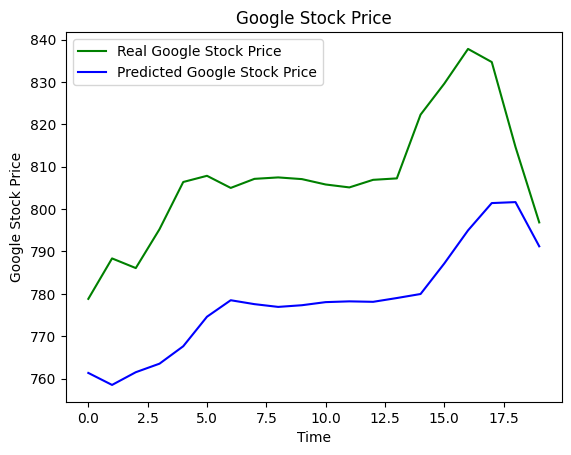

In [24]:
plt.plot(real_stock_price, color='green', label='Real Google Stock Price')
plt.plot(predicted_stock_price, color='blue', label='Predicted Google Stock Price')
plt.title('Google Stock Price')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()
